# Kaiser Window

The **Kaiser window** is a **parametric window** based on the zeroth-order modified Bessel function of the first kind. It provides a trade-off between **main lobe width** and **sidelobe level** through a shape parameter, **β**.

Its definition is:

$$
w[n] = \frac{I_0\left(\beta \sqrt{1 - \left(\frac{2n}{M-1} - 1\right)^2} \right)}{I_0(\beta)}
\quad \text{for } 0 \leq n \leq M-1
$$

Where:

* $I_0$ is the modified Bessel function of the first kind, order 0.
* $\beta$ controls the trade-off:

  * **Low β (e.g., 0–5)** → wider sidelobes, narrower main lobe.
  * **High β (e.g., 8–10)** → lower sidelobes, but wider main lobe.

The Kaiser window is very flexible and commonly used in filter design.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import i0  # Modified Bessel function

sns.set_style("whitegrid")

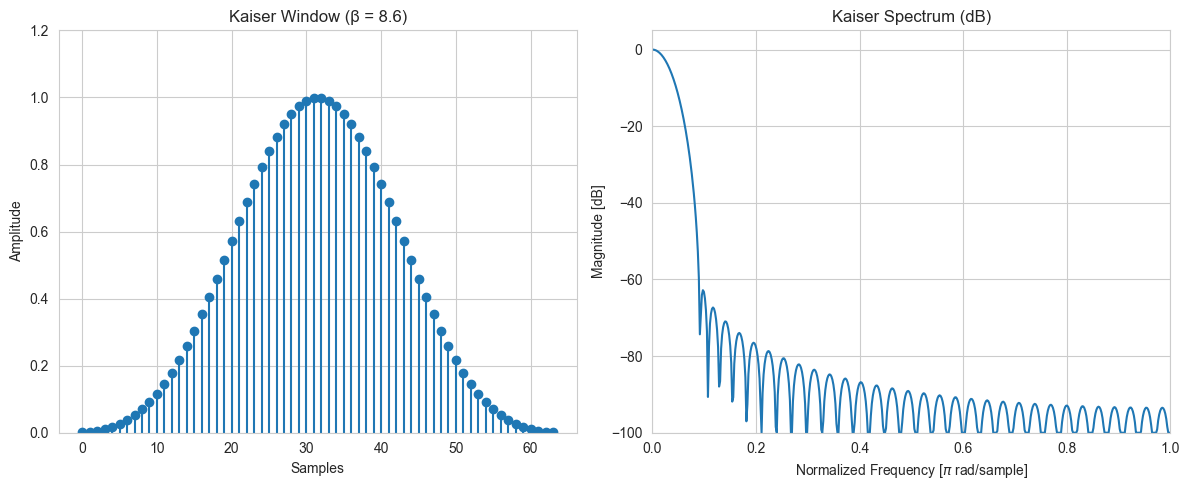

In [2]:
# --- Parameters ---
M = 64
N = 2**int(np.ceil(np.log2(M * 16)))
dB_cut = -100
beta = 8.6  # Controls the window shape (adjustable)
eps = np.finfo(float).eps  # Small value to avoid division by zero

n = np.arange(M)

# --- Kaiser window formula ---
alpha = (M - 1) / 2.0
wkaiser = i0(beta * np.sqrt(1 - ((n - alpha) / alpha)**2)) / i0(beta)

# --- Zero-padding and centering ---
is_odd = M % 2
half = (M - is_odd) // 2
wkaiser_zp = np.concatenate([wkaiser[half:], np.zeros(N - M), wkaiser[:half]])

# --- FFT and dB normalization ---
W = np.fft.fft(wkaiser_zp)
W_dB = 20 * np.log10(np.abs(W) + eps)
W_dB -= np.max(W_dB)
W_dB = np.maximum(W_dB, dB_cut)

# --- Frequency axis ---
nf = np.linspace(0, 2, N, endpoint=False)

# --- Plotting ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(n, wkaiser, basefmt=" ")
plt.title(f"Kaiser Window (β = {beta})")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.ylim(0, 1.2)

plt.subplot(1, 2, 2)
plt.plot(nf, W_dB)
plt.title("Kaiser Spectrum (dB)")
plt.xlabel(r"Normalized Frequency [$\pi$ rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(dB_cut, 5)

plt.tight_layout()
plt.show()

## Notes

* The **Kaiser window** can approximate other windows:

  * $\beta = 0$ → rectangular window
  * $\beta \approx 5$ → Hamming-like
  * $\beta \approx 8.6$ → \~ Blackman-Harris performance
* Ideal for **adaptive designs**, where you can tune the desired compromise between resolution and leakage.
* Especially useful in **filter design** via the **Kaiser FIR method**.